## **Image Classification with Custom Architecture**

In [1]:
train_data_path = '/content/drive/MyDrive/Deep Learning/CNN/Multilabel Classification/training_data'
test_data_path = '/content/drive/MyDrive/Deep Learning/CNN/Multilabel Classification/testing_data'


In [2]:
import os
os.listdir(train_data_path)

['pnemonia', 'normal', 'covid']

In [3]:
import os
os.listdir(test_data_path)

['pnemonia', 'normal', 'covid']

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import sklearn

In [5]:
# # reading one cat image

# plt.figure(figsize=(5,3))
# cat_image = cv2.imread(train_data_path+'/cats/cat.1.jpg')
# plt.imshow(cat_image[:,:,::-1])

In [6]:
# # reading one dog image

# plt.figure(figsize=(5,3))
# dog_image = cv2.imread(train_data_path+'/dogs/dog.1.jpg')
# plt.imshow(dog_image[:,:,::-1])

In [7]:
# for better training purpose
import tensorflow
from tensorflow import keras

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
training_data_tech = ImageDataGenerator(rescale=1/255,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True)


testing_data_tech = ImageDataGenerator(rescale=1/255)

In [10]:
target_labels = os.listdir(train_data_path)

In [11]:
train_final_data = training_data_tech.flow_from_directory(train_data_path,
                                                          target_size=(256, 256),
                                                          classes = target_labels,
                                                          class_mode='categorical',
                                                          batch_size=5)


Found 240 images belonging to 3 classes.


In [12]:
test_final_data = testing_data_tech.flow_from_directory(test_data_path,
                                                        classes = target_labels,
                                                        target_size=(256,256))

Found 30 images belonging to 3 classes.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.activations import relu,softmax
import warnings
warnings.filterwarnings('ignore')

In [14]:
# create the Architecture

# custom structure


model = Sequential()

# first kernel and max poo layers
model.add(Conv2D(128 , kernel_size = (3,3) , input_shape = (int(256),int(256),3) , padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


# second kernel and max poo layers
model.add(Conv2D(64 , kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


# third kernel and max poo layers
model.add(Conv2D(32 , kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


# forth kernel and max poo layers
model.add(Conv2D(6 , kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


model.add(Flatten()) # one dimensional array


# above 1d data give to ANN
model.add(Dense(32,activation='relu')) # hiddel layer 1
model.add(Dense(16,activation = 'relu')) # hiddel layer 2


# output layer
model.add(Dense(len(os.listdir(train_data_path)),activation='softmax'))


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 6)           │           1,734 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          49,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 147,337 (575.54 KB)

 Trainable params: 147,337 (575.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['Accuracy'])

In [18]:
model.fit(train_final_data,
          epochs=5
          )

Epoch 1/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - Accuracy: 0.3310 - loss: 1.0981
Epoch 2/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - Accuracy: 0.6047 - loss: 0.9098
Epoch 3/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - Accuracy: 0.6015 - loss: 0.8048
Epoch 4/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - Accuracy: 0.7073 - loss: 0.5445
Epoch 5/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - Accuracy: 0.7744 - loss: 0.5521


In [20]:
model.predict(test_final_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([[3.28475505e-01, 6.71253085e-01, 2.71395867e-04],
       [4.21892516e-02, 8.39083046e-02, 8.73902380e-01],
       [2.43077636e-01, 7.56847441e-01, 7.48398015e-05],
       [3.72381657e-02, 1.06431067e-01, 8.56330812e-01],
       [1.98921480e-04, 1.50972116e-03, 9.98291254e-01],
       [2.83082854e-02, 7.00690746e-02, 9.01622713e-01],
       [1.19012013e-01, 8.80849421e-01, 1.38512973e-04],
       [1.32893324e-01, 7.59889901e-01, 1.07216686e-01],
       [1.42252818e-03, 1.61507167e-02, 9.82426703e-01],
       [3.72339427e-01, 6.27329230e-01, 3.31429183e-04],
       [3.15322220e-01, 6.82480931e-01, 2.19672988e-03],
       [3.02014917e-01, 6.97915912e-01, 6.90337693e-05],
       [3.29600483e-01, 6.69888437e-01, 5.11121645e-04],
       [9.32487249e-02, 3.48152220e-01, 5.58599055e-01],
       [1.12265855e-01, 8.87583375e-01, 1.50633510e-04],
       [3.10770329e-02, 9.68833566e-01, 8.93390461e-05],
       [2.32082635e-01, 7.67840743e-01, 7.66420635e-05],
       [3.08091752e-02, 9.68141

In [21]:
a = [2.46882322e-04, 3.34301242e-03, 9.96410072e-01]
np.argmax(a)
# ['pnemonia', 'normal', 'covid']

2

In [22]:
# check the New data point

def checking(path):
  test_image = cv2.imread(path,1) # reading the image

  re_test_img = cv2.resize(test_image,(256,256)) # resizing the image

  sc_test_img = re_test_img / 255 # scale down the pixels

  final_input_image = np.expand_dims(sc_test_img,axis=0) # adding an extra dimension

  if np.argmax(model.predict(final_input_image)) == 0 :
    print('pnemonia')
  elif np.argmax(model.predict(final_input_image)) == 1:
    print('normal')
  else :
    print("covid")

  plt.imshow(test_image[:,:,::-1])




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
covid


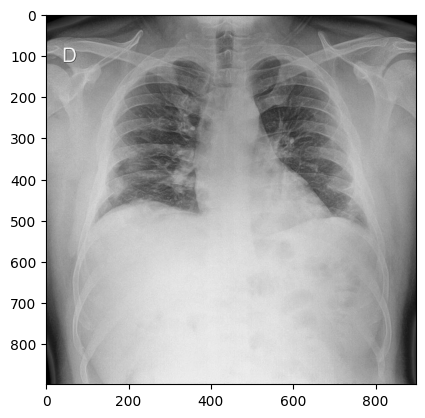

In [23]:
checking('/content/drive/MyDrive/Deep Learning/CNN/Multilabel Classification/testing_data/covid/COVID19(81).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
normal


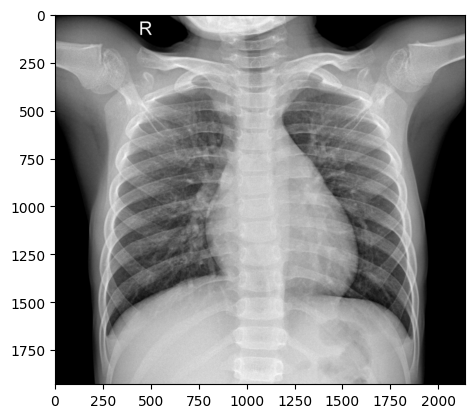

In [26]:
checking('/content/drive/MyDrive/Deep Learning/CNN/Multilabel Classification/testing_data/normal/NORMAL(83).jpg')